In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
redwine = pd.read_csv("winequality-red.csv")
df = redwine.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [17]:
df.isnull().values.any()



False

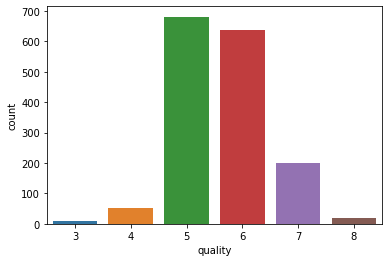

In [18]:
sns.countplot(x = "quality" , data = df);

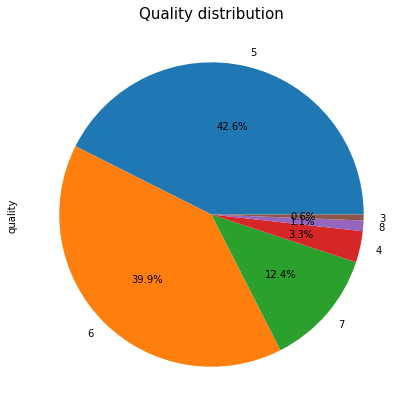

In [19]:
plt.figure(1, figsize = (12,7))
plt.title("Quality distribution", color = "black", fontsize = 15)
df["quality"].value_counts().plot.pie(autopct = "%1.1f%%");

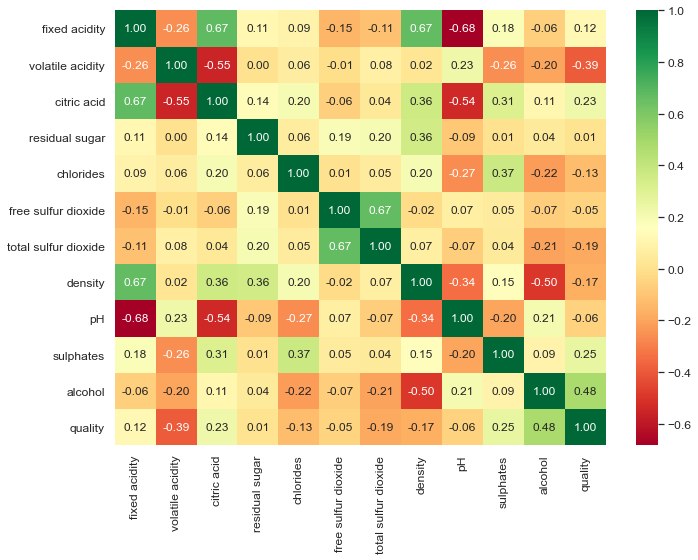

In [20]:
plt.figure(figsize = (11,8))
sns.set(font_scale = 1.1)
sns.heatmap(df.corr() , cmap = "RdYlGn", annot = True, fmt = ".2f", annot_kws = {"size": 12});

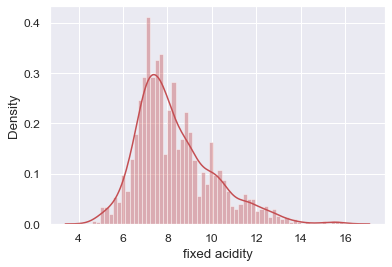

In [21]:
sns.distplot(df["fixed acidity"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [22]:
print("Skewness: %f" % df["fixed acidity"].skew())
print("Kurtosis: %f" % df["fixed acidity"].kurt())
test_statistic, pvalue = shapiro(df["fixed acidity"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 0.982751
Kurtosis: 1.132143
Shapiro Test Statistic = 0.9420, p-value = 0.0000


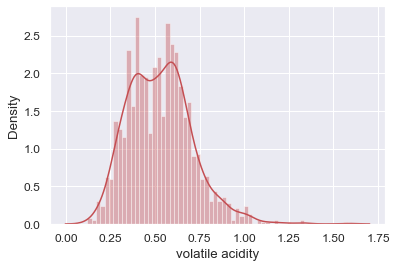

In [23]:
sns.distplot(df["volatile acidity"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [24]:
print("Skewness: %f" % df["volatile acidity"].skew())
print("Kurtosis: %f" % df["volatile acidity"].kurt())
test_statistic, pvalue = shapiro(df["volatile acidity"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 0.671593
Kurtosis: 1.225542
Shapiro Test Statistic = 0.9743, p-value = 0.0000


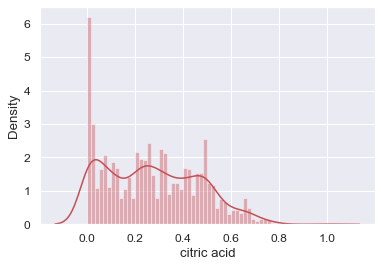

In [25]:
sns.distplot(df["citric acid"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});


In [26]:
print("Skewness: %f" % df["citric acid"].skew())
print("Kurtosis: %f" % df["citric acid"].kurt())
test_statistic, pvalue = shapiro(df["citric acid"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 0.318337
Kurtosis: -0.788998
Shapiro Test Statistic = 0.9553, p-value = 0.0000


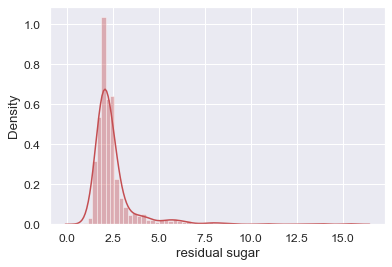

In [27]:
sns.distplot(df["residual sugar"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [28]:
print("Skewness: %f" % df["residual sugar"].skew())
print("Kurtosis: %f" % df["residual sugar"].kurt())
test_statistic, pvalue = shapiro(df["residual sugar"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 4.540655
Kurtosis: 28.617595
Shapiro Test Statistic = 0.5661, p-value = 0.0000


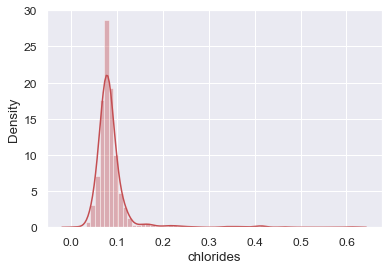

In [29]:
sns.distplot(df["chlorides"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [30]:
print("Skewness: %f" % df["chlorides"].skew())
print("Kurtosis: %f" % df["chlorides"].kurt())
test_statistic, pvalue = shapiro(df["chlorides"])
print('Shapiro Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Skewness: 5.680347
Kurtosis: 41.715787
Shapiro Test Statistic = 0.4842, p-value = 0.0000


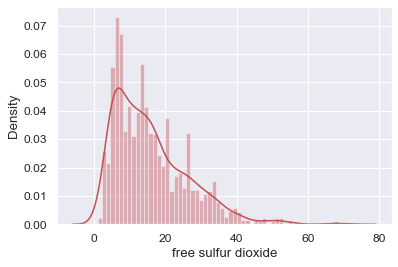

In [31]:
sns.distplot(df["free sulfur dioxide"] , color = "r", bins = 60 , hist_kws = {"alpha": 0.4});

In [32]:
print("Skewness: %f" % df["free sulfur dioxide"].skew())
print("Kurtosis: %f" % df["free sulfur dioxide"].kurt())
test_statistic, pvalue = shapiro(df["free sulfur dioxide"])
print("Shapiro Test Statistic = %.4f, p-value = %.4f" % (test_statistic, pvalue))

Skewness: 1.250567
Kurtosis: 2.023562
Shapiro Test Statistic = 0.9018, p-value = 0.0000


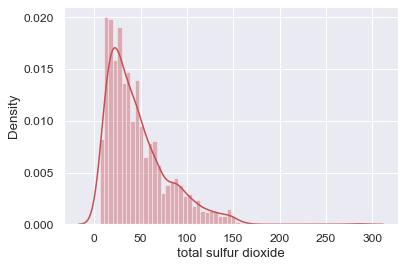

In [33]:
sns.distplot(df["total sulfur dioxide"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [34]:
print("Skewness: %f" % df["total sulfur dioxide"].skew())
print("Kurtosis: %f" % df["total sulfur dioxide"].kurt())
test_statistic , pvalue = shapiro(df["total sulfur dioxide"])
print("Shapiro Test Statistic = %.4f, p-value = %.4f" % (test_statistic , pvalue))

Skewness: 1.515531
Kurtosis: 3.809824
Shapiro Test Statistic = 0.8732, p-value = 0.0000


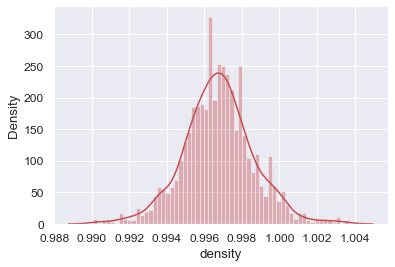

In [35]:
sns.distplot(df["density"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [36]:
print("Skewness: %f" % df["density"].skew())
print("Kurtosis: %f" % df["density"].kurt())
test_statistic, pvalue = shapiro(df["density"])
print("Shapiro Test Statistic = %.4f, pvalue = %.4f" % (test_statistic , pvalue))

Skewness: 0.071288
Kurtosis: 0.934079
Shapiro Test Statistic = 0.9909, pvalue = 0.0000


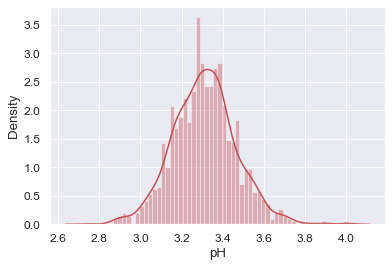

In [37]:
sns.distplot(df["pH"], color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [38]:
print("Skewness : %f" % df["pH"].skew())
print("Kurtosis : %f" % df["pH"].kurt())
test_statistic , pvalue = shapiro(df["pH"])
print("Shapiro Test Statistic : %.4f, pvalue = %.4f" % (test_statistic , pvalue))

Skewness : 0.193683
Kurtosis : 0.806943
Shapiro Test Statistic : 0.9935, pvalue = 0.0000


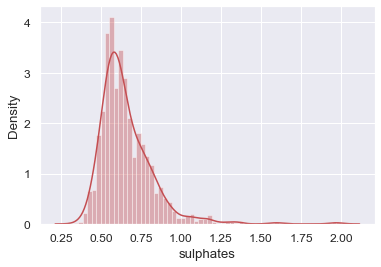

In [39]:
sns.distplot(df["sulphates"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});


In [40]:
print("Skewness : %f" % df["sulphates"].skew())
print("Kurtosis : %f" % df["sulphates"].kurt())
test_statistic , pvalue = shapiro(df["sulphates"])
print("Shapiro Test Statistic : %.4f , pvalue : %.4f" % (test_statistic , pvalue))

Skewness : 2.428672
Kurtosis : 11.720251
Shapiro Test Statistic : 0.8330 , pvalue : 0.0000


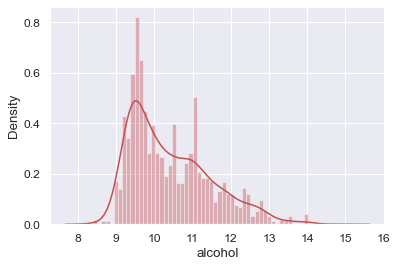

In [41]:
sns.distplot(df["alcohol"] , color = "r" , bins = 60 , hist_kws = {"alpha" : 0.4});

In [42]:
print("Skewness : %f" % df["alcohol"].skew())
print("Kurtosis : %f" % df["alcohol"].kurt())
test_statistic , pvalue = shapiro(df["alcohol"])
print("Shapiro Test Statistic : %.4f , pvalue : %.4f" % (test_statistic , pvalue))

Skewness : 0.860829
Kurtosis : 0.200029
Shapiro Test Statistic : 0.9288 , pvalue : 0.0000


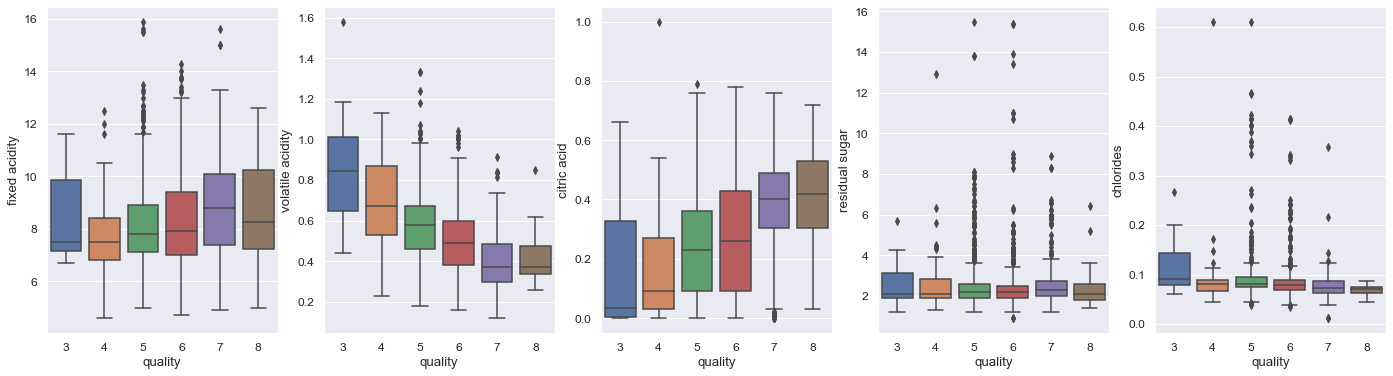

In [43]:
figure, ax = plt.subplots(1,5, figsize = (24,6))
sns.boxplot(data = df, x = "quality", y="fixed acidity", ax = ax[0])
sns.boxplot(data = df, x = "quality", y="volatile acidity", ax = ax[1])
sns.boxplot(data = df, x = "quality", y="citric acid", ax = ax[2])
sns.boxplot(data = df, x = "quality", y="residual sugar", ax = ax[3])
sns.boxplot(data = df, x = "quality", y="chlorides", ax = ax[4])
plt.show()

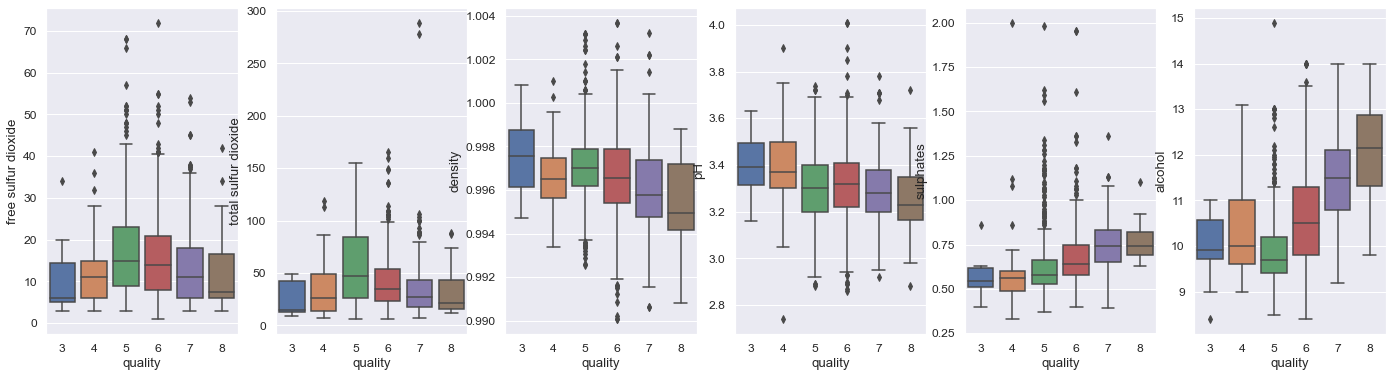

In [44]:
figure, ax = plt.subplots(1,6, figsize = (24,6))
sns.boxplot(data = df, x = "quality", y="free sulfur dioxide", ax = ax[0])
sns.boxplot(data = df, x = "quality", y="total sulfur dioxide", ax = ax[1])
sns.boxplot(data = df, x = "quality", y="density", ax = ax[2])
sns.boxplot(data = df, x = "quality", y="pH", ax = ax[3])
sns.boxplot(data = df, x = "quality", y="sulphates", ax = ax[4])
sns.boxplot(data = df, x = "quality", y="alcohol", ax = ax[5])
plt.show()

In [45]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [46]:
df["quality"] = df["quality"].apply(lambda value : 1 if value >= 7 else 0)

In [47]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [48]:
x = df[df.columns[:-1]]
y = df["quality"]

In [49]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)


In [51]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [52]:
smote = SMOTE(k_neighbors = 4 , random_state = 12)
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()

0    1109
1    1109
Name: quality, dtype: int64

In [53]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train , y_train)

In [109]:
y_pred_knn = knn_model.predict(x_test)
accuracy_score(y_test , y_pred_knn)

0.78125

In [55]:
knn_params = {"n_neighbors": np.arange(1,60)}
knn_cv = GridSearchCV(knn , knn_params, cv = 10)
knn_cv.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])})

In [56]:
print("Best Parameters: " + str(knn_cv.best_params_))

Best Parameters: {'n_neighbors': 2}


In [57]:
knn = KNeighborsClassifier(n_neighbors = 2)
opt_knn = knn.fit(x_train , y_train)

In [58]:
y_pred_knn = opt_knn.predict(x_test)
accuracy_score(y_test , y_pred_knn)

0.878125

In [51]:
print(classification_report(y_test , y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       273
           1       0.57      0.72      0.64        47

    accuracy                           0.88       320
   macro avg       0.76      0.81      0.78       320
weighted avg       0.89      0.88      0.88       320



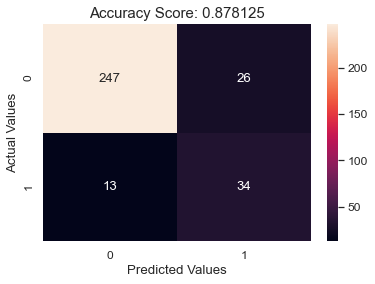

In [59]:
score = round(accuracy_score(y_test, y_pred_knn), 6)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [60]:
logi = LogisticRegression(solver = "liblinear")
log_model = logi.fit(x_train,y_train)

In [61]:
log_model.predict_proba(x_test)[:5]

array([[0.9175195 , 0.0824805 ],
       [0.97295502, 0.02704498],
       [0.65680933, 0.34319067],
       [0.89788912, 0.10211088],
       [0.71828488, 0.28171512]])

In [62]:
y_pred_logi = log_model.predict(x_test)
accuracy_score(y_test, y_pred_logi)

0.803125

In [56]:
cross_val_score(log_model, x_test, y_test, cv = 10).mean()

0.85625

In [57]:
print(classification_report(y_test , y_pred_logi))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.57        47

    accuracy                           0.80       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.80      0.83       320



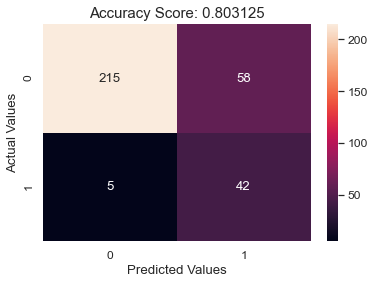

In [63]:
score = round(accuracy_score(y_test, y_pred_logi), 6)
cm = confusion_matrix(y_test, y_pred_logi)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [110]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(x_train, y_train)

In [111]:
y_pred_gbm = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred_gbm)

0.878125

In [112]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 10 , min_samples_split = 5, n_estimators = 300)
opt_gbm = gbm.fit(x_train, y_train)

In [113]:
y_pred_gbm = opt_gbm.predict(x_test)
accuracy_score(y_test, y_pred_gbm)

0.896875

In [63]:
print(classification_report(y_test , y_pred_gbm))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       273
           1       0.68      0.68      0.68        47

    accuracy                           0.91       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.91      0.91      0.91       320



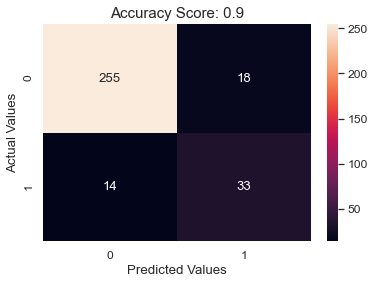

In [70]:
score = round(accuracy_score(y_test, y_pred_gbm), 6)
cm = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [114]:
nb = GaussianNB()
nb_model = nb.fit(x_train , y_train)

In [115]:
nb_model.predict_proba(x_test)[:5]

array([[0.96931896, 0.03068104],
       [0.9956919 , 0.0043081 ],
       [0.90722603, 0.09277397],
       [0.9351253 , 0.0648747 ],
       [0.37097196, 0.62902804]])

In [73]:
y_pred_nb = nb_model.predict(x_test)
accuracy_score(y_test , y_pred_nb)

0.728125

In [74]:
cross_val_score(nb_model, x_test, y_test, cv = 10).mean()

0.84375

In [75]:
print(classification_report(y_test , y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82       273
           1       0.34      0.87      0.49        47

    accuracy                           0.73       320
   macro avg       0.65      0.79      0.65       320
weighted avg       0.88      0.73      0.77       320



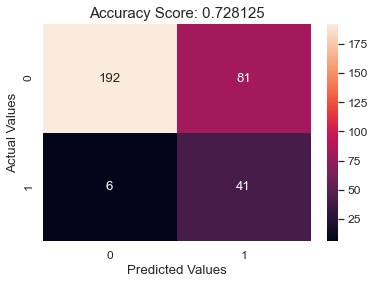

In [70]:
score = round(accuracy_score(y_test, y_pred_nb), 6)
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [116]:
svc = SVC()
svc_model = svc.fit(x_train , y_train)
y_pred_svc = svc_model.predict(x_test)
accuracy_score(y_test , y_pred_svc)

0.871875

In [117]:
svc_params = { "C" : [0.01 , 0.1 , 1 , 2 , 3 , 5 , 7 , 10],
             "gamma" : [0.01 , 0.1 , 1 , 3 , 5 , 7 , 10]}

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2)

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5, 7, 10],
                         'gamma': [0.01, 0.1, 1, 3, 5, 7, 10]},
             verbose=2)

In [78]:
print("Best Parameters: " + str(svc_cv_model.best_params_))

Best Parameters: {'C': 2, 'gamma': 1}


In [79]:
opt_svc = SVC(C = 2 , gamma = 1).fit(x_train, y_train)

In [80]:
y_pred_svc = opt_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)

0.909375

In [77]:
print(classification_report(y_test , y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.78      0.53      0.63        47

    accuracy                           0.91       320
   macro avg       0.85      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



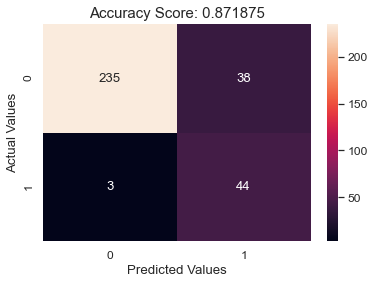

In [118]:
score = round(accuracy_score(y_test, y_pred_svc), 6)
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [119]:
mlpc = MLPClassifier()
mlpc_model = mlpc.fit(x_train , y_train)

In [120]:
y_pred_mlpc = mlpc.predict(x_test)
accuracy_score(y_test, y_pred_mlpc)

0.85

In [121]:
mlpc = MLPClassifier(activation = "relu" , alpha = 0.01,
                     hidden_layer_sizes = (100, 100, 100) , solver = "adam")
opt_mlpc = mlpc.fit(x_train , y_train)

In [122]:
y_pred_mlpc = opt_mlpc.predict(x_test)
accuracy_score(y_test, y_pred_mlpc)

0.9

In [123]:
print(classification_report(y_test , y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       273
           1       0.65      0.70      0.67        47

    accuracy                           0.90       320
   macro avg       0.80      0.82      0.81       320
weighted avg       0.90      0.90      0.90       320



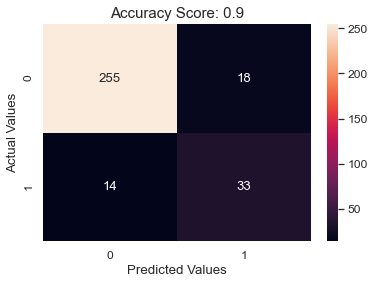

In [124]:
score = round(accuracy_score(y_test, y_pred_mlpc), 6)
cm = confusion_matrix(y_test, y_pred_mlpc)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [126]:
clf = DecisionTreeClassifier()
clf_model = clf.fit(x_train , y_train)
y_pred_clf = clf_model.predict(x_test)
accuracy_score(y_test , y_pred_clf)

0.859375

In [127]:
print(classification_report(y_test , y_pred_clf))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       273
           1       0.52      0.68      0.59        47

    accuracy                           0.86       320
   macro avg       0.73      0.79      0.75       320
weighted avg       0.88      0.86      0.87       320



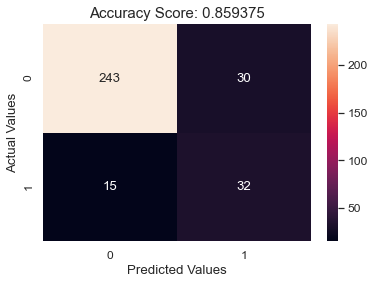

In [128]:
score = round(accuracy_score(y_test, y_pred_clf), 6)
cm = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [89]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred_lgbm)

0.90625

In [129]:
y_pred_lgbm = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred_lgbm)

0.90625

In [130]:
lgbm_params = {"n_estimators": [100 , 500 , 1000],
               "subsample": [0.6 , 0.8 , 1.0],
               "learning_rate": [0.1 , 0.01 , 0.02 , 0.05],
               "min_child_samples": [5 , 10 , 20]}

lgbm_cv_model = GridSearchCV(lgbm , lgbm_params , cv = 10 , n_jobs = -1 , verbose = 2)

lgbm_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [131]:
print("Best Parameters: " + str(lgbm_cv_model.best_params_))

Best Parameters: {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 500, 'subsample': 0.6}


In [132]:
lgbm = LGBMClassifier(learning_rate = 0.1 ,max_depth = 8 , min_child_samples = 10 , 
                      n_estimators = 500 , subsample = 0.6)

opt_lgbm = lgbm.fit(x_train, y_train)

In [90]:
print(classification_report(y_test , y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       273
           1       0.66      0.74      0.70        47

    accuracy                           0.91       320
   macro avg       0.81      0.84      0.82       320
weighted avg       0.91      0.91      0.91       320



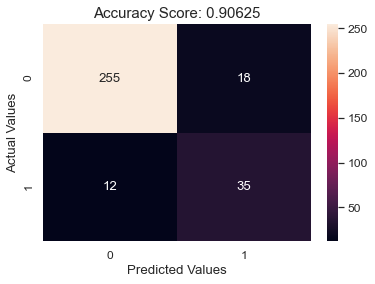

In [92]:
score = round(accuracy_score(y_test, y_pred_lgbm), 6)
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [94]:
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.91875

In [96]:
rf_model = RandomForestClassifier(max_features = "auto" , max_depth = 19,
                                  random_state = 44 , n_estimators = 1000)

opt_rf = rf_model.fit(x_train, y_train)
y_pred_rf = opt_rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.91875

In [97]:
print(classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       273
           1       0.71      0.74      0.73        47

    accuracy                           0.92       320
   macro avg       0.84      0.85      0.84       320
weighted avg       0.92      0.92      0.92       320



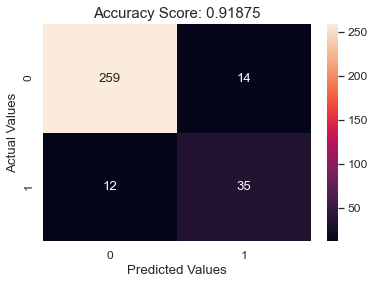

In [98]:
score = round(accuracy_score(y_test, y_pred_rf), 6)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

In [99]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train , y_train)

[15:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [101]:
y_pred_xgb = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.90625

In [102]:
xgb = XGBClassifier(n_estimators = 1000 , learning_rate = 0.1 , subsample = 1 , max_depth = 4)
opt_xgb =  xgb.fit(x_train,y_train)

[15:56:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [103]:
y_pred_xgb = opt_xgb.predict(x_test)
accuracy_score(y_test , y_pred_xgb)

0.9125

In [104]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       273
           1       0.69      0.74      0.71        47

    accuracy                           0.91       320
   macro avg       0.82      0.84      0.83       320
weighted avg       0.92      0.91      0.91       320



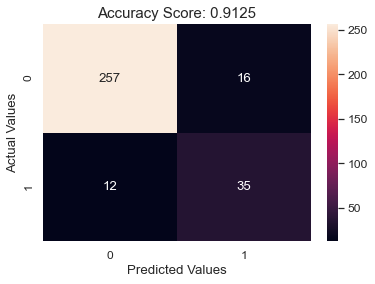

In [105]:
score = round(accuracy_score(y_test, y_pred_xgb), 6)
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Accuracy Score: {0}".format(score), size = 15)
plt.show()

----------------------------
KNeighborsClassifier:
Accuracy: 87.8125%
----------------------------
LogisticRegression:
Accuracy: 80.3125%
----------------------------
GaussianNB:
Accuracy: 72.8125%
----------------------------
GradientBoostingClassifier:
Accuracy: 89.6875%
----------------------------
SVC:
Accuracy: 90.9375%
----------------------------
MLPClassifier:
Accuracy: 90.0000%
----------------------------
DecisionTreeClassifier:
Accuracy: 85.9375%
----------------------------
LGBMClassifier:
Accuracy: 90.9375%
----------------------------
RandomForestClassifier:
Accuracy: 91.8750%
----------------------------
XGBClassifier:
Accuracy: 91.2500%


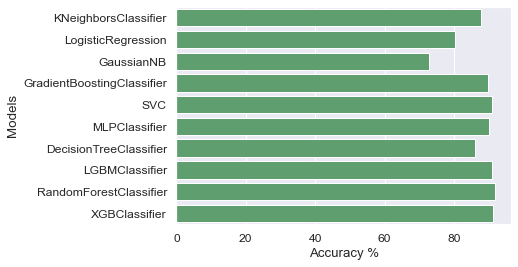

In [133]:
models = [opt_knn , log_model , nb_model , opt_gbm , opt_svc, opt_mlpc , clf_model , opt_lgbm , opt_rf , opt_xgb]
result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])
for x in models:
    names = x.__class__.__name__
    y_pred = x.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-" * 28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
for x in models:
    names = x.__class__.__name__
    y_preds = x.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)    
    result = pd.DataFrame([[names, accuracy * 100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
sns.barplot(x = "Accuracy", y = "Models", data = results, color = "g")
plt.xlabel("Accuracy %");

In [ ]:
#Best accuracy % 91.875 : Random Forest Classifier.

